In [2]:
import numpy as np
import pandas as pd

arquivo1 = pd.ExcelFile('resultados1.xlsx')
dados1 = pd.read_excel(arquivo1,'MulchAtualizado')
dados1.describe()

,Tmax,Tmed,Tmin,Chuva(mm),Flir,x2,x5,x10,x20,x30
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,26.883113,14.183775,19.860596,1.534768,24.235174,20.065563,19.983444,19.989503,22.083113,21.813907
std,2.645729,2.620194,2.251069,6.829233,11.269655,3.193776,3.007983,2.338473,1.871667,1.809537
min,17.500000,7.200000,12.700000,0.000000,2.910000,12.200000,13.900000,15.200000,18.400000,18.500000
25%,25.700000,12.300000,18.700000,0.000000,14.551000,17.300000,17.400000,18.200000,20.400000,20.300000
50%,27.200000,14.600000,20.100000,0.000000,24.122000,20.400000,20.300000,20.200000,22.300000,21.900000
75%,28.600000,16.300000,21.500000,0.000000,33.663500,22.000000,21.675000,21.675000,23.600000,23.275000
max,33.800000,18.600000,24.000000,52.200000,48.566000,29.700000,28.400000,27.300000,26.400000,26.400000


In [3]:
x = dados1['x2']
y = dados1['x5']

In [4]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Jeferson\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [9]:

size = 200
true_intercept = 1
true_slope = 2

#aplicando os metodos do modelo em x
# y = a + b*x

true_regression_line = true_intercept + true_slope * x

# aplica o metodo de regressão em y
y = true_regression_line 

#

data = dict(x=x, y=y)


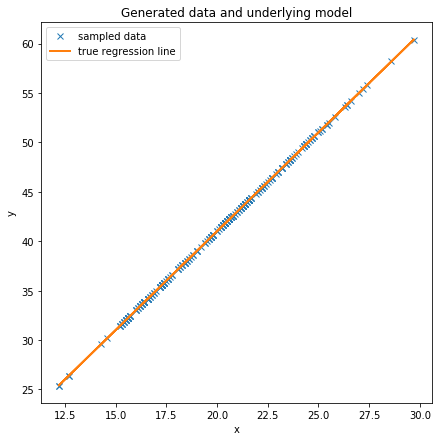

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [8]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [14:54<00:00, 15.40draws/s]
There were 1485 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.05466698047126065, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1320 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.09046454364250667, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [06:26<00:00, 18.11draws/s]
There were 1882 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.015817942144732342, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1581 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.030802918902952187, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\Jeferson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

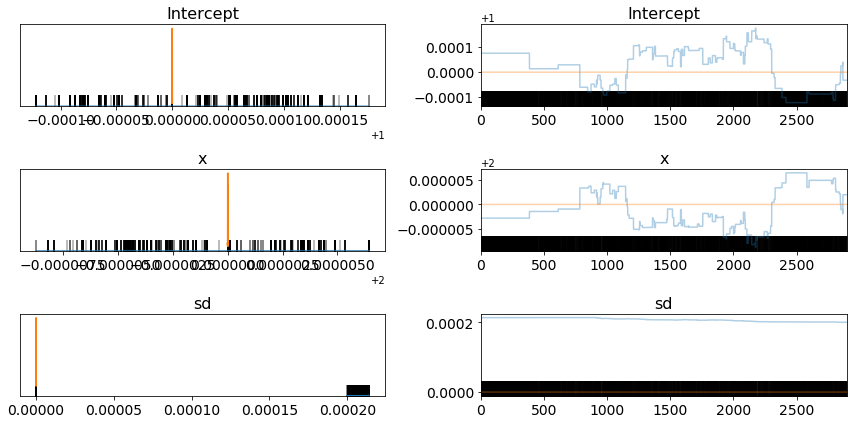

In [10]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

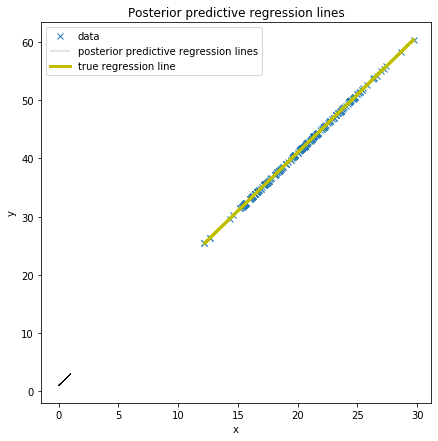

In [11]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');